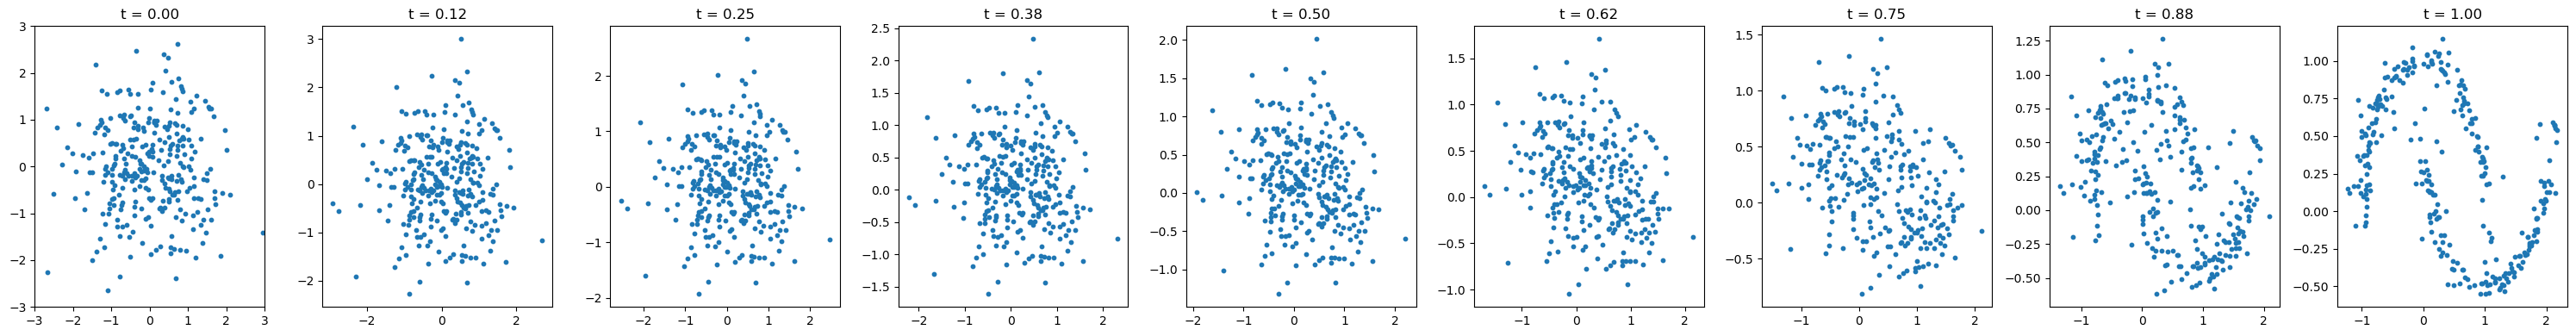

In [19]:
import torch
from torch import nn, Tensor
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
class Flow(nn.Module):
    def __init__(self, dim: int=2, hidden_dim: int=100):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim + 1, hidden_dim), nn.ELU(),
            nn.Linear(hidden_dim, hidden_dim), nn.ELU(),
            nn.Linear(hidden_dim, hidden_dim), nn.ELU(),
            nn.Linear(hidden_dim, dim)
        )
    def forward(self, x: Tensor, t: Tensor) -> Tensor:
        return self.net(torch.cat([x, t], dim=-1))
    def step(self, x_t: Tensor, t_start: Tensor, t_end: Tensor) -> Tensor:
        dt = t_end - t_start
        t_start = t_start.view(1, 1).expand(x_t.shape[0], 1)
        x_mid = self.forward(x_t, t_start) * (dt / 2) + x_t
        x_next = self.forward(x_mid, t_start + dt / 2) * dt + x_t
        return x_next
flow = Flow()
optimizer = torch.optim.Adam(flow.parameters(), lr=1e-2)
loss_func = nn.MSELoss()

for _ in range(10000):
    x_1 = Tensor(make_moons(256, noise=0.05)[0])
    x_0 = torch. randn_like(x_1)
    t = torch. rand(len(x_1), 1)
    x_t = (1 - t) * x_0 + t * x_1
    dx_t = x_1 - x_0
    optimizer.zero_grad()
    loss_func(flow(x_t, t), dx_t).backward()
    optimizer.step()

x = torch.randn(300, 2)
n_steps = 8
fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4))
time_steps = torch.linspace(0, 1.0, n_steps + 1) 
axes[0].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
axes[0].set_title(f't = {time_steps[0]:.2f}')
axes[0].set_xlim(-3.0, 3.0)
axes[0].set_ylim(-3.0, 3.0)

for i in range(n_steps):
    x = flow.step(x, time_steps[i], time_steps[i + 1])
    axes[i + 1].scatter(x.detach()[:, 0], x.detach()[:, 1], s=10)
    axes[i + 1].set_title(f't = {time_steps[i + 1]:.2f}')

plt.tight_layout()
plt.show()
